<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im0.png?raw=true" width="600" height="350">

<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im5.png?raw=true" width="600" height="350">

In [ ]:
!pip install tensorflow==2.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im4.png?raw=true" width="600" height="350">

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("Warehouse.csv")

In [ ]:
data.head()

,date,sales,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [ ]:
 data = data.rename(columns={'date': 'ds', 'sales':'y'})
data['ds'] = pd.to_datetime(data['ds'])

In [ ]:
data.isna().any()

ds       False
y        False
stock    False
price    False
dtype: bool

In [ ]:
data.head()

,ds,y,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


In [ ]:
training_data = data[:int(len(data) * 0.8)]
testing_data = data[int(len(data) * 0.8):]

<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im3.png?raw=true" width="600" height="350">

In [ ]:
model = Prophet(yearly_seasonality=True)
model.add_regressor('stock')
model.add_regressor('price')
model.fit(training_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future= model.make_future_dataframe(periods=24, freq='M')

In [ ]:
future['stock'] = 0
future['price'] = 0

In [ ]:
forecast = model.predict(future)

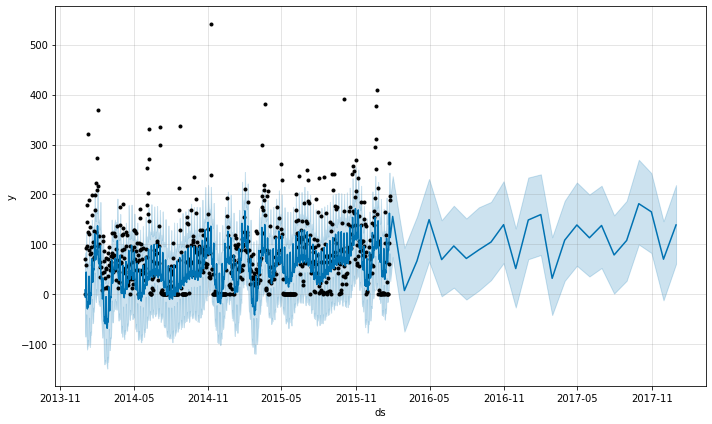

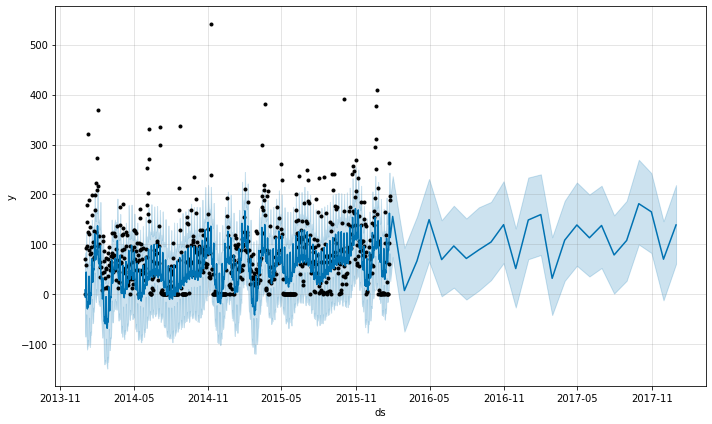

In [ ]:
model.plot(forecast)

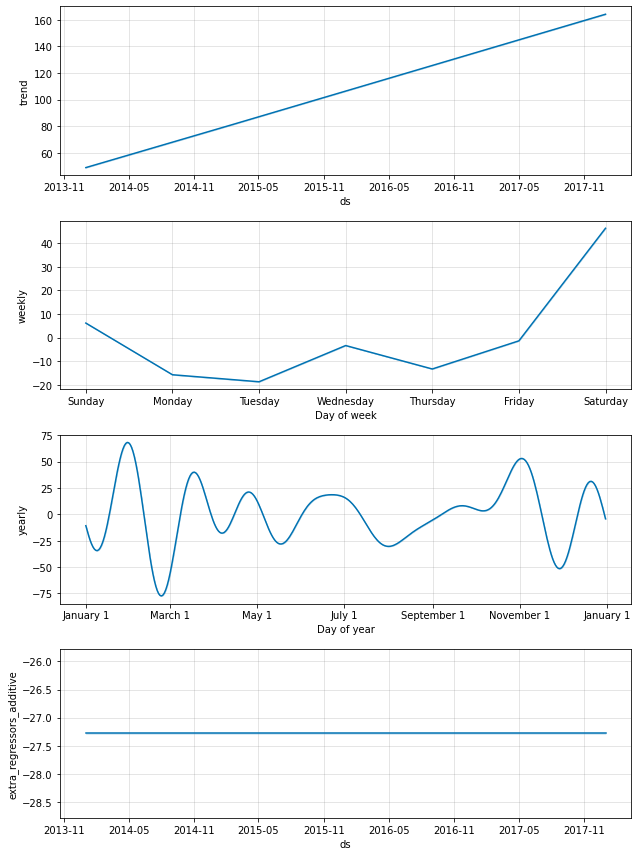

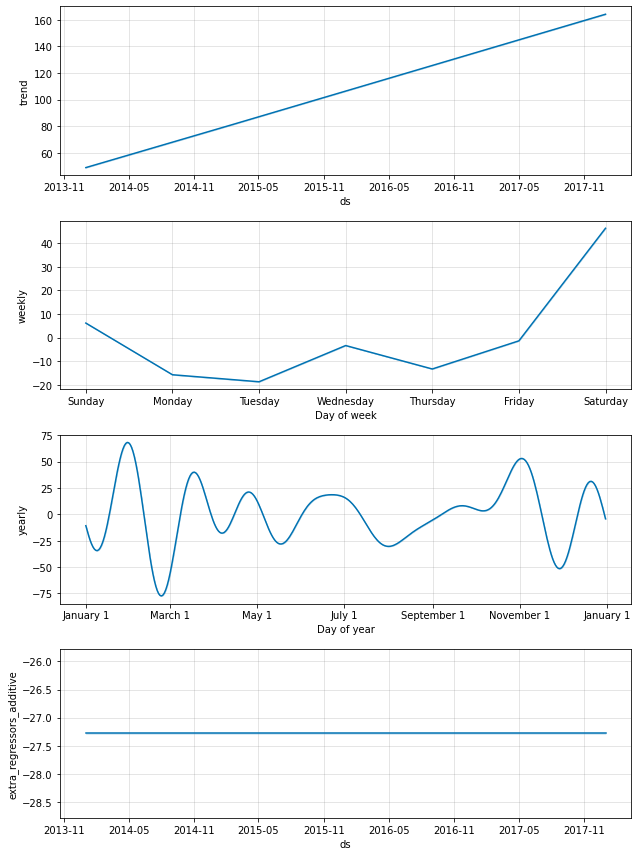

In [ ]:
model.plot_components(forecast)


<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im10.png?raw=true" width="600" height="350">

<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im1.png?raw=true" width="600" height="350">

In [ ]:
df_cv = cross_validation(model, initial='450 days', period='75 days', horizon = '150 days')
df_p = performance_metrics(df_cv)
print(df_cv.head())
print(df_p.head())

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-03-31 00:00:00 and 2015-08-28 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

INFO:fbprophet:Skipping MAPE because y close to 0


          ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2015-04-01   71.140720   -6.769121  147.243223   27 2015-03-31
1 2015-04-02   58.969226  -15.105214  132.689571   27 2015-03-31
2 2015-04-03   64.345834   -9.079691  138.942408   54 2015-03-31
3 2015-04-04  110.228002   35.065570  182.804961  136 2015-03-31
4 2015-04-05   64.619590   -4.546719  141.637962   55 2015-03-31
  horizon          mse       rmse        mae     mdape  coverage
0 15 days  4089.830995  63.951786  44.693107  0.459966  0.866667
1 16 days  4195.937962  64.776060  45.396501  0.459966  0.844444
2 17 days  4319.670385  65.724199  45.901937  0.417803  0.822222
3 18 days  4354.820328  65.991062  46.322981  0.410640  0.822222
4 19 days  5091.507810  71.354802  49.264283  0.417803  0.800000


/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.8/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


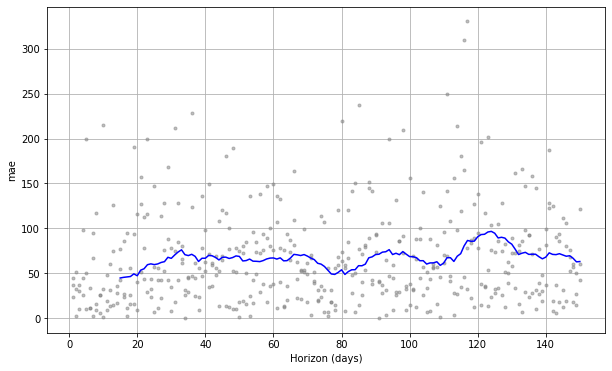

In [ ]:
plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

In [ ]:
data2=pd.DataFrame(df_cv, columns=["yhat", "y"])

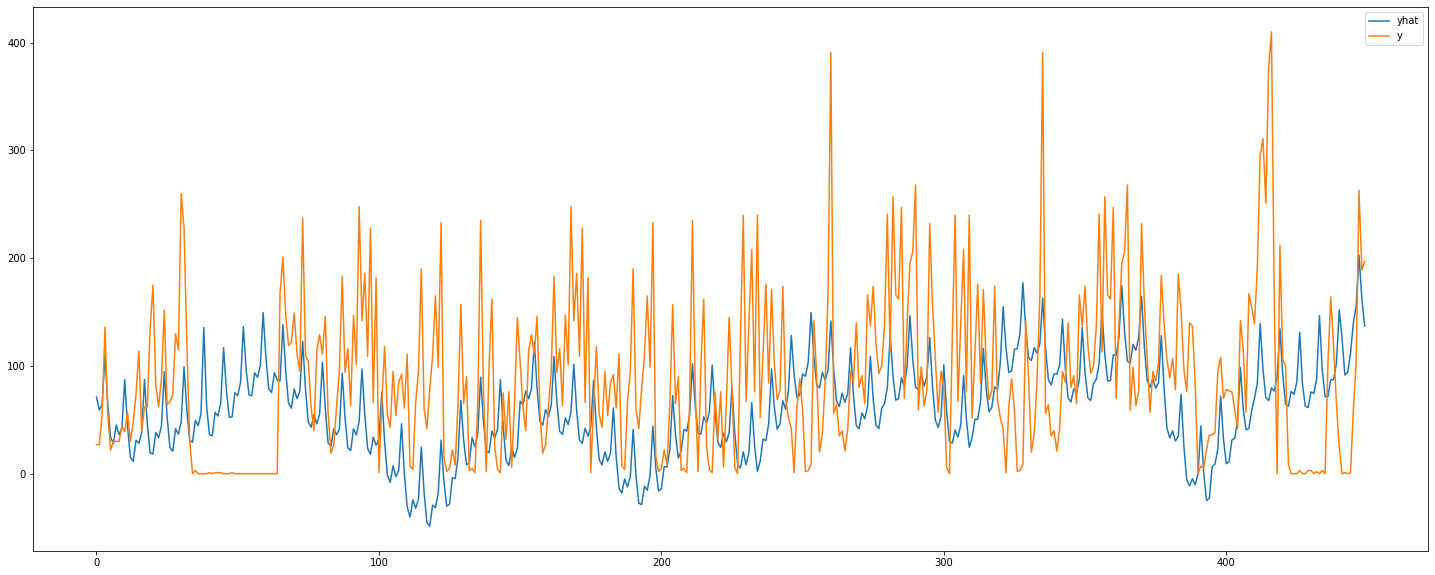

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.plot(data2)
plt.legend(data2)
plt.show()

<img src="https://github.com/webinar-data-science/Session2/blob/main/img/im20.png?raw=true" width="600" height="350">